In [1]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
moves = {1: [1, 0, 0], 
         2: [0, 1, 0], 
         3: [0, 0, 1], 
         4: [-1, 0, 0], 
         5: [0, -1, 0], 
         6: [0, 0, -1]}

#dont need this
def get_move(prev_move):
    move = np.random.randint(1, 7)
    while prev_move == (move + 3) % 6:
        move = np.random.randint(1, 7)
    return move

def sampler(nmoves):
    prev_move = 1
    total_move = np.array(moves[prev_move])
    for i in range(nmoves):
        #prev_move = get_move(prev_move)
        prev_move = np.random.randint(1, 7)
        total_move += np.array(moves[prev_move])
    return np.linalg.norm(total_move)

def normal_distribution(x, mu, sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2)) / np.sqrt(2*np.pi) / sigma

In [3]:
nsamples = 10000
nmoves = 100

samples = [sampler(nmoves) for i in range(nsamples)]

avg = np.average(samples)
std = np.std(samples)
print avg, std

9.35280949582 3.908165111


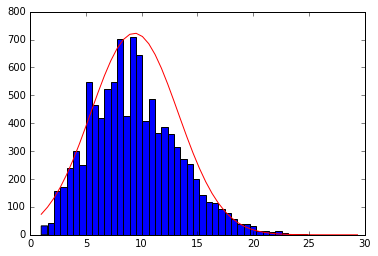

In [4]:
n, bins, _ = plt.hist(np.array(samples), 50)
normal = [normal_distribution(x, avg, std) for x in bins]
plt.plot(bins, np.array(normal)*max(n)*10, 'r')
plt.show()